In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import Image 
from pydot import graph_from_dot_data
import os
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from IPython.display import display

Accuracy: 0.6711864406779661


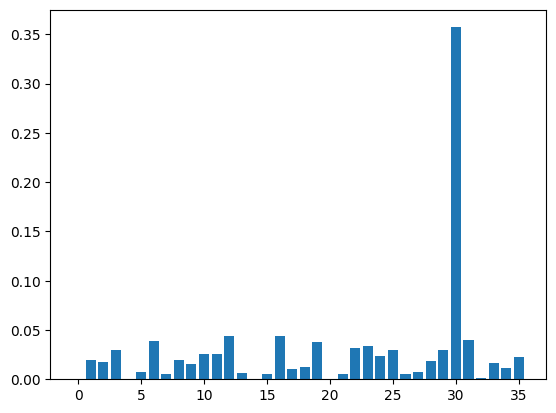

In [8]:
# Doing nothing to the data

df = pd.read_csv("../Data/data.csv", sep=';')
df = pd.DataFrame(df)
X = df.drop("Target", axis=1)
y = df["Target"]
y = pd.get_dummies(y)
#print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
# evaluate
y_pred = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nClassification report:\n", classification_report(y_test, y_pred))
# Get importance
importance = tree_clf.feature_importances_
# Summarize feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy: 0.6903954802259887


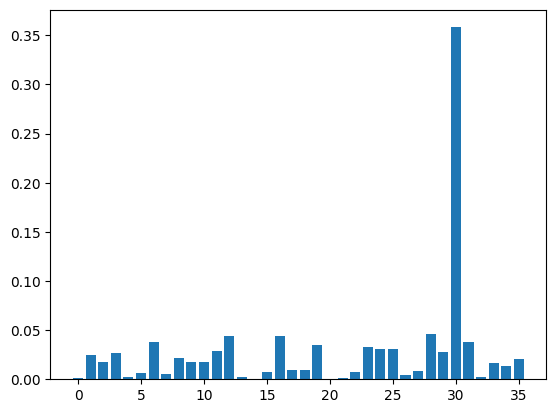

In [9]:
# Scaling data with StandardScaler

df = pd.read_csv("../Data/data.csv", sep=';')
df = pd.DataFrame(df)
X = df.drop("Target", axis=1)
y = df["Target"]
y = pd.get_dummies(y)
#print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)
# evaluate
y_pred = tree_clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nClassification report:\n", classification_report(y_test, y_pred))
# Get importance
importance = tree_clf.feature_importances_
# Summarize feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy: 0.7231638418079096


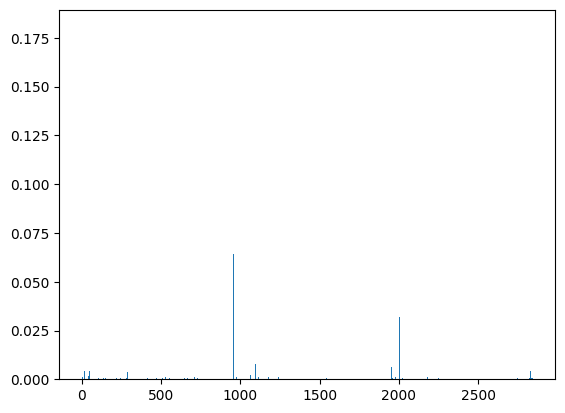

In [10]:
# Creating OneHotEncoder for categorical features

df = pd.read_csv("../Data/data.csv", sep=';')
df = pd.DataFrame(df)
X = df.drop("Target", axis=1)
y = df["Target"]
y = pd.get_dummies(y)
#print(y.head())
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X) 
# Apply the encoder.
X = encoder.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
# evaluate
y_pred = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nClassification report:\n", classification_report(y_test, y_pred))
#print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
# Get importance
importance = tree_clf.feature_importances_
# Summarize feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy: 0.6768361581920904


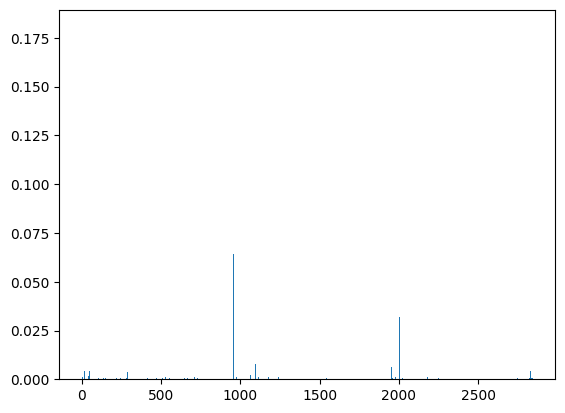

In [11]:
# Median and most frequent for missing values, OneHotEncoding for categoricals

df = pd.read_csv("../Data/data.csv", sep=';')
df = pd.DataFrame(df)
X = df.drop("Target", axis=1)
y = df["Target"]
y = pd.get_dummies(y)

# identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# preprocessing
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit
clf.fit(X_train, y_train)

# evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Get importance
importance = tree_clf.feature_importances_
# Summarize feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy: 0.6757062146892655


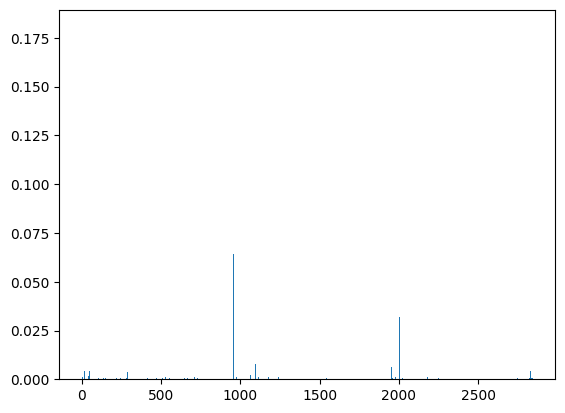

In [12]:
# Combine standard scaling, OneHotEncoding, and median and most frequent for missing values

df = pd.read_csv("../Data/data.csv", sep=';')
df = pd.DataFrame(df)
X = df.drop("Target", axis=1)
y = df["Target"]
y = pd.get_dummies(y)

# identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# preprocessing
# include scaling in the numeric pipeline so ColumnTransformer can work with DataFrame column names
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# keep X as a DataFrame (do not scale/convert to numpy before using ColumnTransformer)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit
clf.fit(X_train, y_train)

# evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Get importance
importance = tree_clf.feature_importances_
# Summarize feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [7]:
# Median and most frequent for missing values, OneHotEncoding for categoricals

# identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# preprocessing
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# train/test split (try to stratify when possible)
stratify = y if y.nunique() > 1 else None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify)

# fit
clf.fit(X_train, y_train)

# evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification report:\n", classification_report(y_test, y_pred))
# print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# # try to plot a shallow tree for inspection
# try:
#     # get feature names after preprocessing
#     feat_names = clf.named_steps['preprocessor'].get_feature_names_out(X.columns)
# except Exception:
#     # fallback to original column names
#     feat_names = X.columns.tolist()

# plt.figure(figsize=(16, 8))
# plot_tree(clf.named_steps['classifier'],
#           feature_names=feat_names,
#           class_names=[str(c) for c in clf.named_steps['classifier'].classes_],
#           filled=True,
#           max_depth=3,
#           fontsize=8)
# plt.show()

# # export full tree to DOT and try to render with graphviz (if available)
# dot_path = "decision_tree.dot"
# export_graphviz(
#     clf.named_steps['classifier'],
#     out_file=dot_path,
#     feature_names=feat_names,
#     class_names=[str(c) for c in clf.named_steps['classifier'].classes_],
#     filled=True,
#     rounded=True,
#     special_characters=True
# )

# try:
#     src = graphviz.Source.from_file(dot_path)
#     src
# except Exception:
#     print(f"Exported tree to {dot_path}. Install/render with Graphviz to view it.")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().